In [2]:
!pip install keras

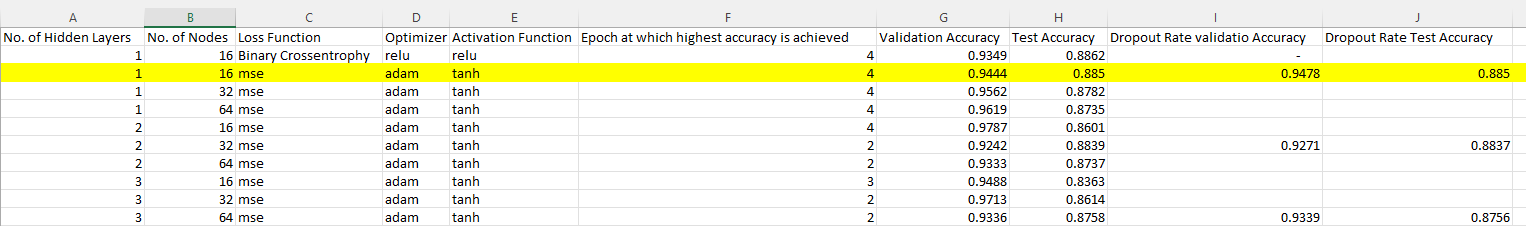

Summary:
1. Deep learning is implemented with each of three hidden layers(1, 2, 3) on nodes of 16, 32, 64.  

2. We have decided the epoch based on highest validation accuracy. Once we identified the decreasing trend in accuracy we consider it as overfit. 

3. We trained the model and applied the test set to achieve the maximum accuracy of 88.50%.

4. When used MSE loss funtion instead of binary cross_entrophy there is a minute decrease of about 0.12% in test accuracy which means Binary cross_entropy is better than MSE for a given data set.

5. When we regularize the model using dropout technique for the maximum test accuracy function, no change is observed in accuracy of validation and test sets. So, addition of dropout will not bring any advnatage in generalizing the model for a given data.

Conclusion:
We conclude that by using different hyperparameters like different hidden layers, no. of neurons in each layer, changing the loss functions, changing the optimizers and using dropout technique, the maximum test accuracy is almost the same.

In [1]:
!pip install tensorflow

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [8]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 34ms/step - loss: 0.4924 - accuracy: 0.7941 - val_loss: 0.3669 - val_accuracy: 0.8724
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2870 - accuracy: 0.9049 - val_loss: 0.2921 - val_accuracy: 0.8890
Epoch 3/20
30/30 [==============================] - 0s 17ms/step - loss: 0.2091 - accuracy: 0.9284 - val_loss: 0.2763 - val_accuracy: 0.8906
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1661 - accuracy: 0.9443 - val_loss: 0.2767 - val_accuracy: 0.8898
Epoch 5/20
30/30 [==============================] - 1s 18ms/step - loss: 0.1366 - accuracy: 0.9555 - val_loss: 0.2883 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.1159 - accuracy: 0.9629 - val_loss: 0.3246 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0930 - accuracy: 0.9736 - val_loss: 0.3431 - val_accuracy: 0.8765
Epoch 8/20
30

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

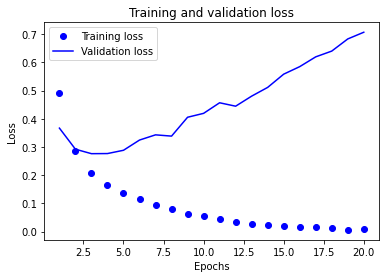

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

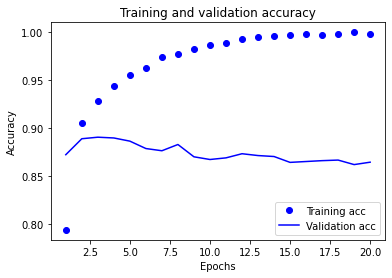

In [17]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 12ms/step - loss: 0.5114 - accuracy: 0.8140
Epoch 2/4
49/49 [==============================] - 1s 11ms/step - loss: 0.2935 - accuracy: 0.9004
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.2175 - accuracy: 0.9230
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2853 - accuracy: 0.8862


In [19]:
results

[0.2853229343891144, 0.8862000107765198]

In [20]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.20671734],
       [0.9995048 ],
       [0.8333704 ],
       ...,
       [0.1201504 ],
       [0.06847945],
       [0.58025736]], dtype=float32)

In [21]:
#We used 1 hidden layer 16 nodes

Epoch 1/20
30/30 [==============================] - 2s 55ms/step - loss: 0.1712 - binary_accuracy: 0.7862 - val_loss: 0.1241 - val_binary_accuracy: 0.8615
Epoch 2/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0948 - binary_accuracy: 0.9013 - val_loss: 0.0993 - val_binary_accuracy: 0.8829
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0705 - binary_accuracy: 0.9294 - val_loss: 0.0903 - val_binary_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0565 - binary_accuracy: 0.9468 - val_loss: 0.0863 - val_binary_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0468 - binary_accuracy: 0.9571 - val_loss: 0.0859 - val_binary_accuracy: 0.8857
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0398 - binary_accuracy: 0.9658 - val_loss: 0.0850 - val_binary_accuracy: 0.8860
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

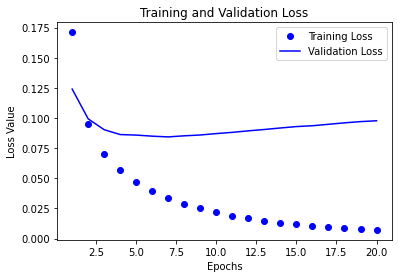

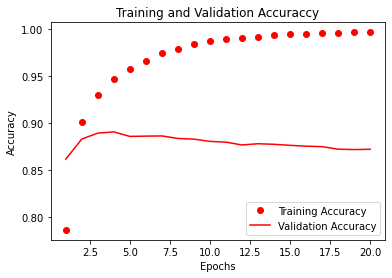

Epoch 1/4
49/49 [==============================] - 2s 21ms/step - loss: 0.1531 - accuracy: 0.8184
Epoch 2/4
49/49 [==============================] - 1s 21ms/step - loss: 0.0843 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 1s 21ms/step - loss: 0.0646 - accuracy: 0.9304
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.0866 - accuracy: 0.8856


[0.08659487962722778, 0.885640025138855]

In [64]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results


Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.1628 - binary_accuracy: 0.7957 - val_loss: 0.1224 - val_binary_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0939 - binary_accuracy: 0.9083 - val_loss: 0.1005 - val_binary_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0706 - binary_accuracy: 0.9289 - val_loss: 0.0890 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 0s 17ms/step - loss: 0.0564 - binary_accuracy: 0.9445 - val_loss: 0.0839 - val_binary_accuracy: 0.8911
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0460 - binary_accuracy: 0.9543 - val_loss: 0.0829 - val_binary_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0387 - binary_accuracy: 0.9644 - val_loss: 0.0828 - val_binary_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

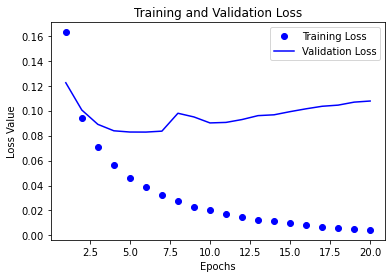

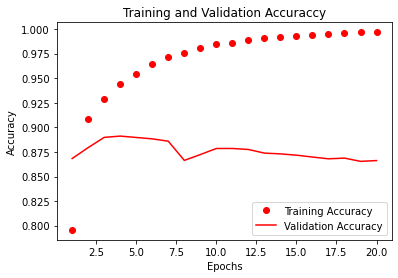

Epoch 1/4
49/49 [==============================] - 1s 10ms/step - loss: 0.1455 - accuracy: 0.8169
Epoch 2/4
49/49 [==============================] - 1s 10ms/step - loss: 0.0790 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 1s 11ms/step - loss: 0.0606 - accuracy: 0.9332
Epoch 4/4
782/782 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.8851


[0.08651221543550491, 0.8850799798965454]

In [60]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results


In [23]:
#We used 1 hidden layer 32 nodes

Epoch 1/20
30/30 [==============================] - 4s 27ms/step - loss: 0.1534 - binary_accuracy: 0.7981 - val_loss: 0.1093 - val_binary_accuracy: 0.8761
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0836 - binary_accuracy: 0.9109 - val_loss: 0.0910 - val_binary_accuracy: 0.8861
Epoch 3/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0610 - binary_accuracy: 0.9341 - val_loss: 0.0835 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0470 - binary_accuracy: 0.9510 - val_loss: 0.0858 - val_binary_accuracy: 0.8831
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0379 - binary_accuracy: 0.9611 - val_loss: 0.0871 - val_binary_accuracy: 0.8804
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0313 - binary_accuracy: 0.9685 - val_loss: 0.0877 - val_binary_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - los

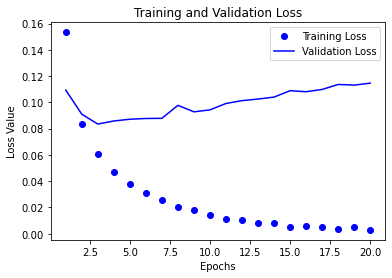

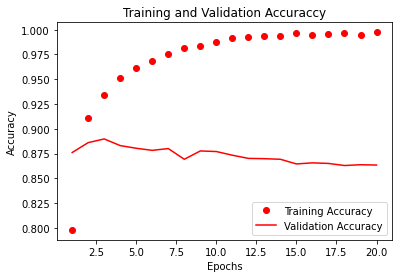

Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1294 - accuracy: 0.8412
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0679 - accuracy: 0.9215
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.0520 - accuracy: 0.9420
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0888 - accuracy: 0.8783


[0.08883827179670334, 0.878279983997345]

In [39]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [25]:
#we take 1 hiddenlayer 64 nodes

Epoch 1/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1521 - binary_accuracy: 0.7841 - val_loss: 0.1310 - val_binary_accuracy: 0.8166
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0763 - binary_accuracy: 0.9109 - val_loss: 0.0891 - val_binary_accuracy: 0.8827
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0553 - binary_accuracy: 0.9351 - val_loss: 0.0863 - val_binary_accuracy: 0.8823
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0440 - binary_accuracy: 0.9489 - val_loss: 0.0830 - val_binary_accuracy: 0.8887
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0339 - binary_accuracy: 0.9622 - val_loss: 0.0929 - val_binary_accuracy: 0.8730
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0280 - binary_accuracy: 0.9696 - val_loss: 0.0920 - val_binary_accuracy: 0.8773
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

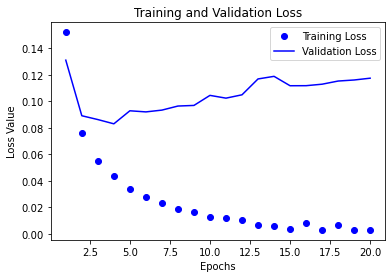

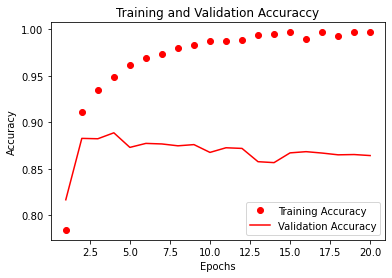

Epoch 1/4
49/49 [==============================] - 1s 17ms/step - loss: 0.1231 - accuracy: 0.8424
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0613 - accuracy: 0.9265
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.0453 - accuracy: 0.9494
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.0929 - accuracy: 0.8735


[0.09290125221014023, 0.873520016670227]

In [38]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [27]:
#We consider hidden layer 2 and nodes 16

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1615 - binary_accuracy: 0.7794 - val_loss: 0.1098 - val_binary_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0805 - binary_accuracy: 0.9095 - val_loss: 0.0944 - val_binary_accuracy: 0.8738
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0566 - binary_accuracy: 0.9343 - val_loss: 0.0851 - val_binary_accuracy: 0.8835
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0412 - binary_accuracy: 0.9521 - val_loss: 0.0840 - val_binary_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0319 - binary_accuracy: 0.9637 - val_loss: 0.0874 - val_binary_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0262 - binary_accuracy: 0.9697 - val_loss: 0.0951 - val_binary_accuracy: 0.8759
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - los

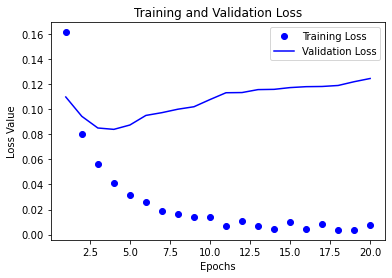

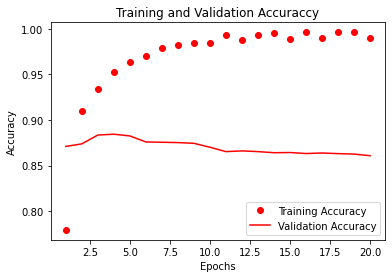

Epoch 1/4
49/49 [==============================] - 1s 14ms/step - loss: 0.1378 - accuracy: 0.8256
Epoch 2/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0648 - accuracy: 0.9189
Epoch 3/4
49/49 [==============================] - 1s 12ms/step - loss: 0.0463 - accuracy: 0.9462
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.0947 - accuracy: 0.8736


[0.09468847513198853, 0.8735600113868713]

In [41]:
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1527 - binary_accuracy: 0.8019 - val_loss: 0.0983 - val_binary_accuracy: 0.8810
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0722 - binary_accuracy: 0.9117 - val_loss: 0.0835 - val_binary_accuracy: 0.8877
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0496 - binary_accuracy: 0.9394 - val_loss: 0.0836 - val_binary_accuracy: 0.8866
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0369 - binary_accuracy: 0.9542 - val_loss: 0.0866 - val_binary_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0304 - binary_accuracy: 0.9633 - val_loss: 0.0915 - val_binary_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0209 - binary_accuracy: 0.9768 - val_loss: 0.0977 - val_binary_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 0s 15ms/step - los

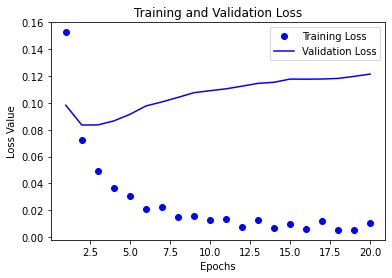

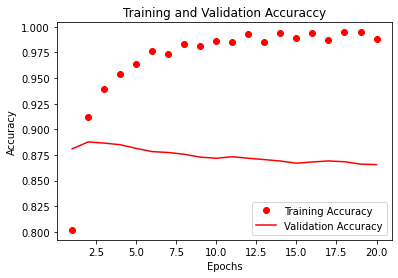

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1327 - accuracy: 0.8278
Epoch 2/2
782/782 [==============================] - 1s 2ms/step - loss: 0.0854 - accuracy: 0.8839


[0.08541067689657211, 0.8839200139045715]

In [48]:
#We consider hidden layer 2 32 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results



Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1505 - binary_accuracy: 0.7981 - val_loss: 0.0947 - val_binary_accuracy: 0.8830
Epoch 2/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0726 - binary_accuracy: 0.9071 - val_loss: 0.0825 - val_binary_accuracy: 0.8887
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0493 - binary_accuracy: 0.9382 - val_loss: 0.0840 - val_binary_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.0382 - binary_accuracy: 0.9514 - val_loss: 0.0886 - val_binary_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0280 - binary_accuracy: 0.9655 - val_loss: 0.1018 - val_binary_accuracy: 0.8700
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0259 - binary_accuracy: 0.9687 - val_loss: 0.1073 - val_binary_accuracy: 0.8670
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - los

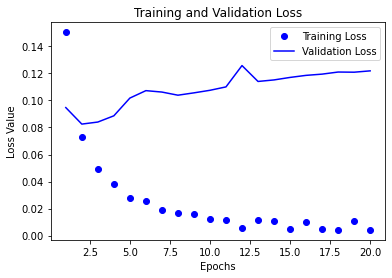

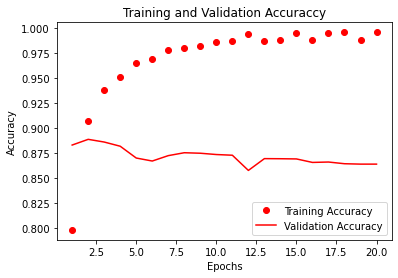

Epoch 1/2
49/49 [==============================] - 1s 12ms/step - loss: 0.1290 - accuracy: 0.8332
Epoch 2/2
782/782 [==============================] - 1s 1ms/step - loss: 0.0866 - accuracy: 0.8838


[0.0865623950958252, 0.8837599754333496]

In [61]:
#We consider hidden layer 2 32 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [49]:
#We consider hidden layer 2 64 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()


Epoch 1/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1558 - binary_accuracy: 0.7732 - val_loss: 0.0940 - val_binary_accuracy: 0.8765
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0716 - binary_accuracy: 0.9093 - val_loss: 0.0815 - val_binary_accuracy: 0.8899
Epoch 3/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0514 - binary_accuracy: 0.9340 - val_loss: 0.0912 - val_binary_accuracy: 0.8775
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.0396 - binary_accuracy: 0.9504 - val_loss: 0.1010 - val_binary_accuracy: 0.8663
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.0326 - binary_accuracy: 0.9584 - val_loss: 0.1019 - val_binary_accuracy: 0.8714
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0285 - binary_accuracy: 0.9647 - val_loss: 0.1026 - val_binary_accuracy: 0.8729
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

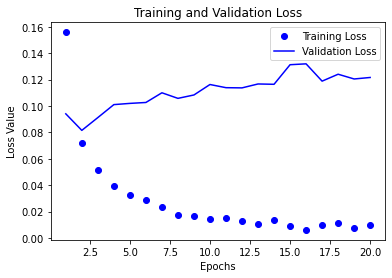

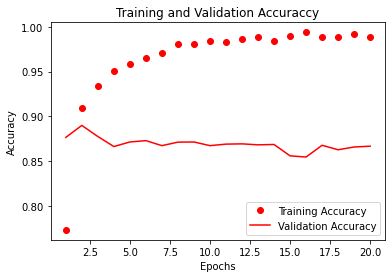

Epoch 1/2
49/49 [==============================] - 1s 17ms/step - loss: 0.1119 - accuracy: 0.8498
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0949 - accuracy: 0.8738


[0.09487271308898926, 0.8737599849700928]

In [50]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [52]:
#we consider hidden layer 3 nodes 16
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1572 - binary_accuracy: 0.7911 - val_loss: 0.1070 - val_binary_accuracy: 0.8640
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.0743 - binary_accuracy: 0.9108 - val_loss: 0.0936 - val_binary_accuracy: 0.8723
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0503 - binary_accuracy: 0.9373 - val_loss: 0.0828 - val_binary_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0392 - binary_accuracy: 0.9517 - val_loss: 0.0873 - val_binary_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0291 - binary_accuracy: 0.9658 - val_loss: 0.0919 - val_binary_accuracy: 0.8806
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0226 - binary_accuracy: 0.9729 - val_loss: 0.1047 - val_binary_accuracy: 0.8722
Epoch 7/20
30/30 [==============================] - 0s 16ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

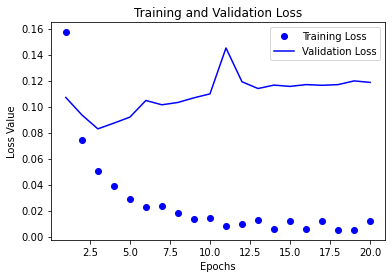

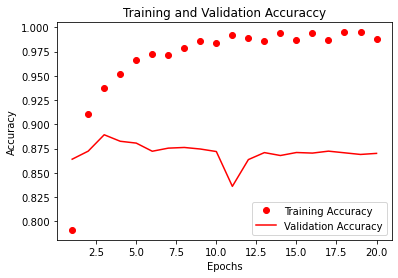

Epoch 1/3
49/49 [==============================] - 1s 11ms/step - loss: 0.1356 - accuracy: 0.8322
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.0610 - accuracy: 0.9237
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.0929 - accuracy: 0.8764


[0.09292199462652206, 0.8763599991798401]

In [54]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [55]:
#Hidden layer 3 nodes 32
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.1500 - binary_accuracy: 0.7831 - val_loss: 0.0890 - val_binary_accuracy: 0.8856
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0705 - binary_accuracy: 0.9059 - val_loss: 0.0821 - val_binary_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0487 - binary_accuracy: 0.9395 - val_loss: 0.0872 - val_binary_accuracy: 0.8846
Epoch 4/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0412 - binary_accuracy: 0.9481 - val_loss: 0.0939 - val_binary_accuracy: 0.8778
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0308 - binary_accuracy: 0.9627 - val_loss: 0.1087 - val_binary_accuracy: 0.8674
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0251 - binary_accuracy: 0.9705 - val_loss: 0.1027 - val_binary_accuracy: 0.8749
Epoch 7/20
30/30 [==============================] - 1s 19ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

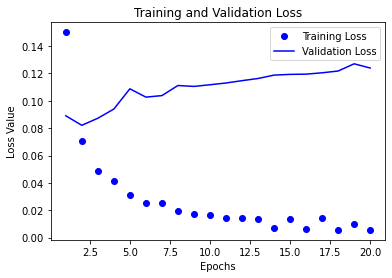

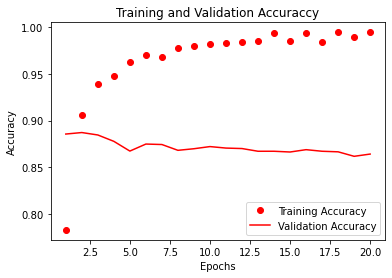

Epoch 1/6
49/49 [==============================] - 1s 12ms/step - loss: 0.1196 - accuracy: 0.8414
Epoch 2/6
49/49 [==============================] - 1s 13ms/step - loss: 0.0541 - accuracy: 0.9316
Epoch 3/6
49/49 [==============================] - 1s 15ms/step - loss: 0.0386 - accuracy: 0.9542
Epoch 4/6
49/49 [==============================] - 1s 14ms/step - loss: 0.0309 - accuracy: 0.9648
Epoch 5/6
49/49 [==============================] - 1s 13ms/step - loss: 0.0271 - accuracy: 0.9693
Epoch 6/6
782/782 [==============================] - 1s 2ms/step - loss: 0.1185 - accuracy: 0.8614


[0.11853034794330597, 0.8614400029182434]

In [56]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=6, batch_size=512)
results = model.evaluate(x_test, y_test)

results

In [57]:
#We consider layer 3 64 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer'adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()



Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.1465 - binary_accuracy: 0.7897 - val_loss: 0.0906 - val_binary_accuracy: 0.8788
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0717 - binary_accuracy: 0.9036 - val_loss: 0.0846 - val_binary_accuracy: 0.8850
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0508 - binary_accuracy: 0.9345 - val_loss: 0.1010 - val_binary_accuracy: 0.8661
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0407 - binary_accuracy: 0.9484 - val_loss: 0.1060 - val_binary_accuracy: 0.8665
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0337 - binary_accuracy: 0.9587 - val_loss: 0.0973 - val_binary_accuracy: 0.8762
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0293 - binary_accuracy: 0.9631 - val_loss: 0.1019 - val_binary_accuracy: 0.8742
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

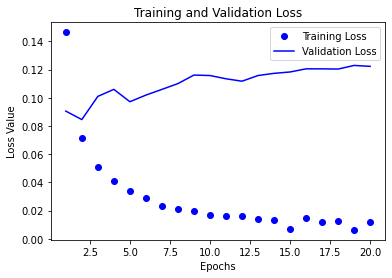

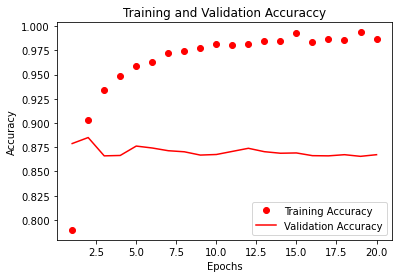

Epoch 1/2
49/49 [==============================] - 1s 16ms/step - loss: 0.1114 - accuracy: 0.8501
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0945 - accuracy: 0.8759


[0.0945444405078888, 0.8758800029754639]

In [59]:
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.1512 - binary_accuracy: 0.7825 - val_loss: 0.0933 - val_binary_accuracy: 0.8740
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.0703 - binary_accuracy: 0.9075 - val_loss: 0.1465 - val_binary_accuracy: 0.8033
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0516 - binary_accuracy: 0.9343 - val_loss: 0.0994 - val_binary_accuracy: 0.8723
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0381 - binary_accuracy: 0.9515 - val_loss: 0.1250 - val_binary_accuracy: 0.8447
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0354 - binary_accuracy: 0.9550 - val_loss: 0.1204 - val_binary_accuracy: 0.8527
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0279 - binary_accuracy: 0.9657 - val_loss: 0.1068 - val_binary_accuracy: 0.8720
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - los

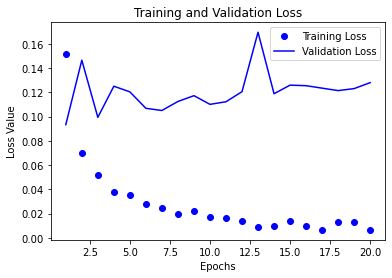

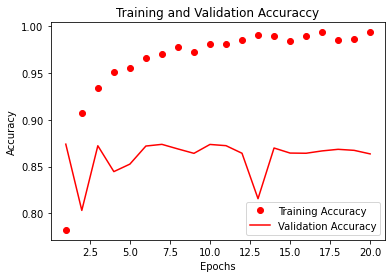

Epoch 1/2
49/49 [==============================] - 1s 15ms/step - loss: 0.1120 - accuracy: 0.8439
Epoch 2/2
782/782 [==============================] - 2s 2ms/step - loss: 0.0947 - accuracy: 0.8757


[0.09471779316663742, 0.8756800293922424]

In [62]:
#We consider layer 3 64 nodes
from keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label="Training Loss")
plt.plot(epochs, val_loss_values, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, acc_values, 'ro', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

results
